# Exploratory Data Analsis

**Problem Statement:** Given a google map satellite photo, we will have to predict the street view of the same given google map satellite photo.



**Dataset:**  The dataset was downloaded from kaggle. The download link is given below.

**Dataset Link:** https://www.kaggle.com/alincijov/pix2pix-maps

## 1.0 Imports

In [48]:
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt

## 1.1 Dataset paths

In [2]:
os.chdir("../")
train_folder_path = "data/dataset/train"
val_folder_path = "data/dataset/val"

In [49]:
num_train_images = len(os.listdir(train_folder_path))
num_val_images = len(os.listdir(val_folder_path))

print("Training images: ", num_train_images)
print("Validation images:",  num_val_images)

Training images:  1096
Validation images: 1098


## 1.2 Plotting some images randomly

In [72]:
def show_map(normalize = False, return_image = False):
    """
    This function will randomly select images from the training folder and then
    plot it using matplotlib
    """
    index = np.random.randint(low = 0, high = num_train_images)
    image_name = os.listdir(train_folder_path)[index]
    image_path = os.path.join(train_folder_path, image_name)

    map_image = cv2.imread(image_path)
    RGB_map_image = cv2.cvtColor(map_image, cv2.COLOR_RGB2BGR)
    
    plt.figure(figsize = (12, 8))
    
    if normalize:
        RGB_map_image = (RGB_map_image / 127.5) - 1.0
        plt.imshow(RGB_map_image);
    else:
        plt.imshow(RGB_map_image);
        
    if return_image:    return RGB_map_image

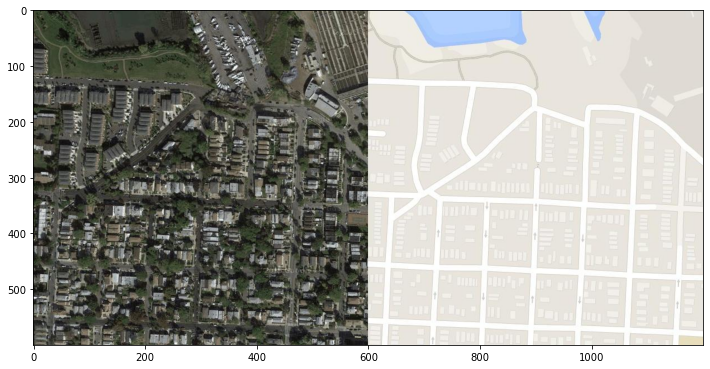

In [73]:
show_map()

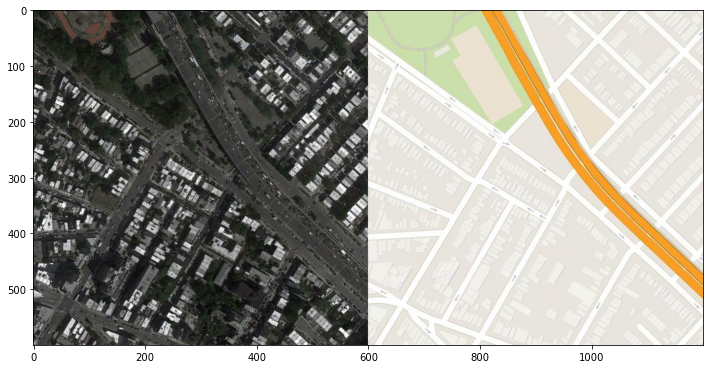

In [74]:
show_map()

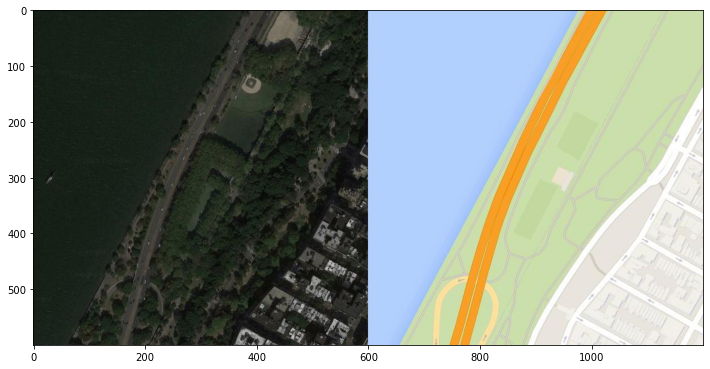

In [84]:
source_target = show_map(return_image= True)

In [89]:
maximum_val = np.max(source_target)
minimum_val = np.min(source_target)

print("Max value:", maximum_val, "| Minimum value:", minimum_val)

Max value: 255 | Minimum value: 0


**Observation:**
1. If images are not normalized then all the values are in berween 0 and 255. 

## 2.0 Checking if all of our training images are of same size

In [35]:
# checking if all images have the same dimension
image_dimensions = []
for image_name in os.listdir(train_folder_path):
    map_image_path = os.path.join(train_folder_path, image_name)
    map_image_shape = cv2.imread(map_image_path).shape
    if map_image_shape not in image_dimensions:
        image_dimensions.append(map_image_shape)

In [41]:
# all the images have the same height width and channels
print("Height:", image_dimensions[0][0])
print("Width:", image_dimensions[0][1])
print("Channels:", image_dimensions[0][2])

Height: 600
Width: 1200
Channels: 3


**Obsevation:**
1. Each image in the training data is an RGB image.
2. All images have the same dimensions.
3. Source image and target image are stacked side by side.
4. For a single source image or target image, the size must be (600, 600, 3).

## 3.0 Plotting normalized images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


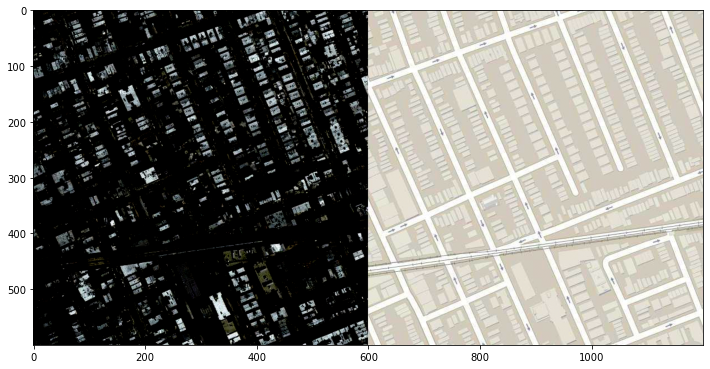

In [67]:
show_map(normalize=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


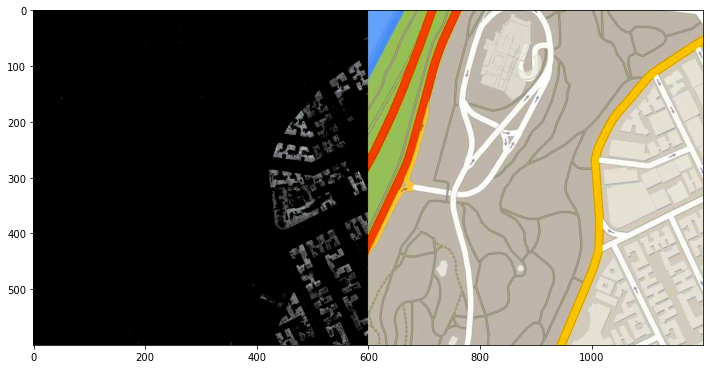

In [77]:
normalized_image = show_map(normalize=True, return_image= True)

In [88]:
maximum_val = np.max(normalized_image)
minimum_val = np.min(normalized_image)

print("Max value:", maximum_val, "| Minimum value:", minimum_val)

Max value: 1.0 | Minimum value: -1.0


After image normalization all the pixel values will be in between [+1, -1]